### CLASSIFICADOR COM TENSOR FLOW

Implementar um classificador utilizando a biblioteca do TensorFlow para o database Iris Setosa.

In [1]:
#Instalando o Tensor Flow
#!pip install tensorflow==2.6.2

In [2]:
#Versaão do Keras
!pip list | grep keras

keras                   2.6.0


In [3]:
#Versão do TensorFlow
!pip list | grep tensorflow

tensorflow              2.6.2
tensorflow-estimator    2.6.0


### Importação das bibliotecas

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


# Bibliotecas do SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Bibliotecas do Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

### Preprocessamento

In [5]:
#Carregando a base de dados
df_iris = pd.read_csv("./iris.csv")

In [6]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#Estatísticas gerais sobre a base de dados
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Informaçãoes sobre as features
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visulalização de dados

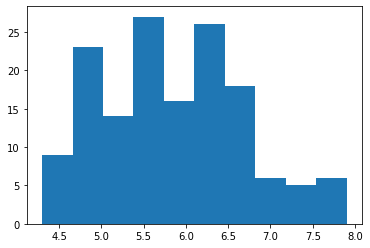

In [9]:
#Observando algumas distribuições
plt.hist(x = df_iris['sepal_length']);

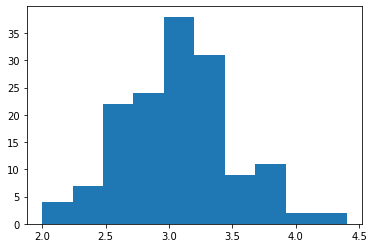

In [10]:
plt.hist(x = df_iris['sepal_width']);

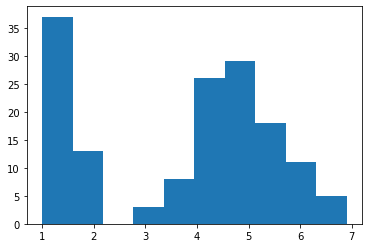

In [11]:
plt.hist(x = df_iris['petal_length']);

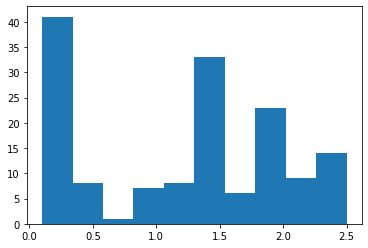

In [12]:
plt.hist(x = df_iris['petal_width']);


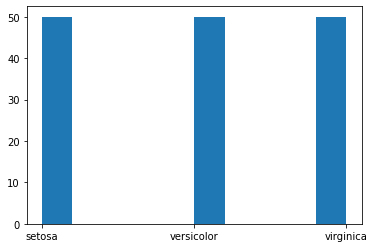

In [13]:
plt.hist(x = df_iris['species']);

### Tratamento de valores inconsistentes

In [14]:
# Verificando o total registros com valores nulos
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
# Verificando valores inconsistentes
nomes_colunas = list(df_iris.columns)  #Lista com os nomes dos atributos

# Negativos
for i in nomes_colunas:
    if (i != "species"):
        print("Atributo: " + i)
        print(df_iris.loc[df_iris[i] < 0])  #Retorna os registros com valores negativos para cada atributo
        print("\n")


Atributo: sepal_length
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Atributo: sepal_width
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Atributo: petal_length
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Atributo: petal_width
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []




### Preparação dos dados para entrada no Modelo

In [16]:
#Divisão entre previsores e classe
X = df_iris.loc[:, df_iris.columns != 'species']
y = df_iris.loc[:, ['species']]

In [17]:
# Transformações de dados
# Label Encoder
y_enc = LabelEncoder().fit_transform(y)  #Categórico para numérico discreto
# Aplicando o one hot enconding diretamente num array numérico 1D
y_label = tf.keras.utils.to_categorical(y_enc)  
print(y_enc)   #Array numérico discreto das classes
#y_label        #Saída com o One Hot

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/home/leandro/Win/DADOS/Tablet/PosGrad_IA_PUC-MG/VENV/linux_venv/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
#Normalização dos dados
from sklearn.preprocessing import *
#scaler = StandardScaler()  #Ajuste com StandardScaler
#X_scaled = scaler.fit_transform(X)  
X_scaled = normalize(X) #Normalizando os dados
X_scaled[1:5:,:]  #Retorna as 4 primriras linhas do array


array([[0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

In [19]:
#Divisão de base de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
                    X_scaled, y_label, 
                    test_size = 0.25, 
                    random_state = 0
                    )

In [20]:
#Exportando como CSV o databese preprocessado

# Previsores
X_export = pd.DataFrame(X_scaled, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
X_export.to_csv("./tensor_iris_preprocessed_input.csv", index=False)

# Classe alvo
y_export = pd.DataFrame(y_enc)
y_export.to_csv("./tensor_iris_preprocessed_target.csv", index=False)


### Criando o Modelo com o Tensor Flow

In [21]:
#Definição do modelo
model = Sequential([
        keras.layers.Input(shape=X_treinamento.shape[1:]),  #Definição da camada de entrada, nesse caso são 4 atributos
        keras.layers.Dense(4, activation='relu'),    #Número de neurônios da primeira camada oculta e função de ativação
        keras.layers.Dense(4, activation='relu'),    #Adicionando uma segunda camada oculta
        keras.layers.Dropout(0.2),  #O dropout ajuda a previnir overfiting, a taxa varia entre 0 a 1 com valores usuais pequenos
        keras.layers.Dense(3, activation='softmax')  #Camada de saída com 3 classes alvo e ativação softmax
    ])

In [22]:
# Dimensão da camada de entrada, retorna o shape do primeiro registro de variáveis de entrada
X_treinamento.shape[1:]

(4,)

In [23]:
#Resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Compilando o modelo
from tensorflow.keras import optimizers

model.compile(
#              optimizer='adam',                                 #Adam para o backpropagation
              optimizer=optimizers.RMSprop(learning_rate=0.001), #Otimizador RMSprop com learning rate especificada
              loss=keras.losses.CategoricalCrossentropy(),       #Função de perda
              metrics=['accuracy']                               #Métrica utilizada
             )

In [25]:
#Treinamento do modelo
history = model.fit(X_treinamento, y_treinamento, epochs=1000, validation_data=(X_teste, y_teste), verbose=0)

### Análise do modelo

In [26]:
#Checando a acurácia
model.evaluate(X_teste, y_teste)

2/2 [==============================] - 0s 4ms/step - loss: 0.2009 - accuracy: 0.9737


[0.20087750256061554, 0.9736841917037964]

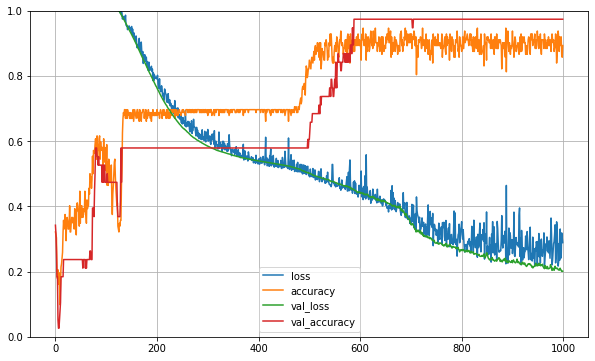

In [27]:
#Evolução de performance
pd.DataFrame(history.history).plot(figsize=(10,6))  #Evolução das métricas
plt.grid(True)            #Mostra as linhas de grade
plt.gca().set_ylim(0, 1)  #Limites do eixo y
plt.show()                #Gera o gráfico

In [28]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(X_teste)                 #Retorna a predição da base de teste
y_prediction = np.argmax (y_prediction, axis = 1)     #Retorna o índice do array com maior valor (classe predita)
y_test=np.argmax(y_teste, axis=1)                     #Classe correta

#Cria a matriz de confusão com as classes preditas nas colunas
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print("\nResultado normalizado:")
print(result)
not_norm_result = confusion_matrix(y_test, y_prediction)
print("\nResultado não normalizado:")
print(not_norm_result)


Resultado normalizado:
[[1.  0.  0. ]
 [0.  1.  0.1]
 [0.  0.  0.9]]

Resultado não normalizado:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [29]:
#Gravando o classificador
from keras.models import load_model

# Para gravar um classificador
model.save('tensorflow_iris_classifier.h5')  #Cria um arquivo HDF5 para salvar o classificador

# Para ler um classificador salvo
model1 = load_model('tensorflow_iris_classifier.h5')

#Comparação entre modelo salvo e já treinado, confirma-se que não há perda.
print(model.evaluate(X_teste, y_teste))
print(model1.evaluate(X_teste, y_teste))

2/2 [==============================] - 0s 4ms/step - loss: 0.2009 - accuracy: 0.9737
[0.20087750256061554, 0.9736841917037964]
2/2 [==============================] - 0s 4ms/step - loss: 0.2009 - accuracy: 0.9737
[0.20087750256061554, 0.9736841917037964]


### Predição

In [30]:
#Predição de um lote de dados
new_data, y_actual = X_teste[:3], y_teste[:3]
print(new_data.shape)              #Formato da entrada de dados
y_proba = model.predict(new_data)  #Predição
print(f"Actual data : {y_actual}")
print(y_proba)                     #Matriz das probabilidades de predição
for pred in y_proba:
    print(np.argmax(pred))         #Retorna o índice com maior valor

(3, 4)
Actual data : [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[7.5039361e-03 2.0583186e-01 7.8666419e-01]
 [5.7041254e-02 8.7733132e-01 6.5627471e-02]
 [9.9999988e-01 1.7094068e-07 7.4173451e-17]]
2
1
0


In [31]:
#Predição de 1 registro
X_predict = np.array(X_teste[5])   #Registro selecionado
y_correct_predict = y_teste[5]     #Classificação correta

X_predict_list = list()            #Ajuste de dimensões (transposição)
for i in X_predict:
    X_predict_list.append([i])
X_predict_transpose = np.array(X_predict_list).T
print(X_predict_transpose.shape)

y_predict = model.predict(X_predict_transpose)   #Predição
print(y_predict)
print(y_correct_predict)
print(np.argmax(y_predict))


(1, 4)
[[0.00750394 0.20583186 0.7866642 ]]
[0. 0. 1.]
2


In [32]:
X = [[5, 7.2, 5.1, 2.2]]
print(np.array(X).shape)
y_proba = model.predict(X)   #Predição por entrada direta
y_proba

(1, 4)


array([[1.0000000e+00, 1.1520659e-28, 0.0000000e+00]], dtype=float32)